In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Objective

Develop a model that can predict whether a patient has diabetes or not.

In [2]:
df = pd.read_csv('/content/diabetes.csv')

# EDA(Exploratory Data Analysis)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The data will have to be normalised.

In [5]:
df.shape

(768, 9)

768 rows and 9 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


No objects.

In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


No missing values.

<Axes: >

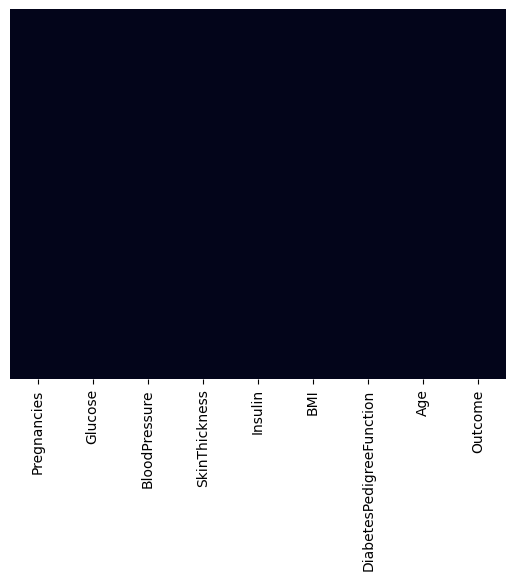

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

No missing values.

# Analyse the target 'Outcome'

In [9]:
df["Outcome"].unique()

array([1, 0])

In [10]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


* 1 - 268 people have diabetes
* 0 - 500 people do not have diabetes

Data is imbalanced.

# Check correlation of the features with the target 'Outcome'

In [11]:
print(df.corr()["Outcome"].abs().sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


The correlation with the target ranges from weak to moderate. SkinThickness and BloodPressure may not be important factors in determining whether a person has diabetes.

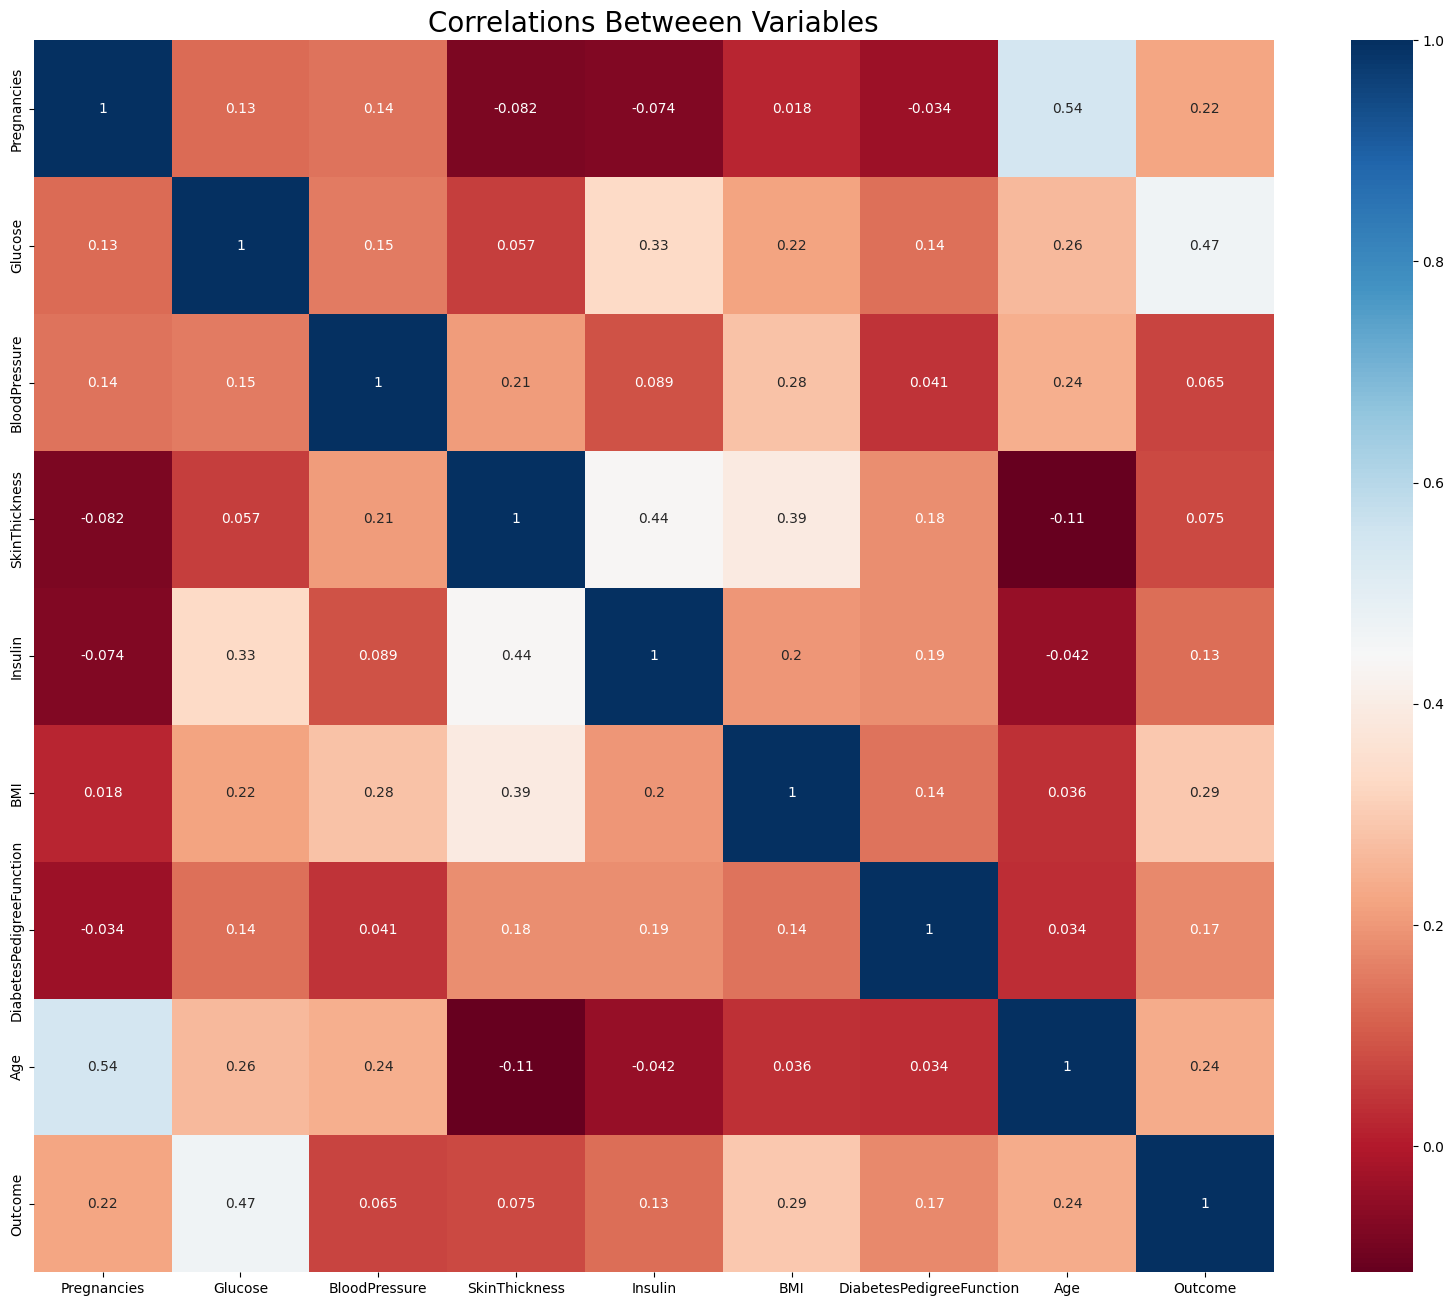

In [12]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Variables", size=20)
plt.show()

# DATA VISUALIZATION

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<Figure size 200x200 with 0 Axes>

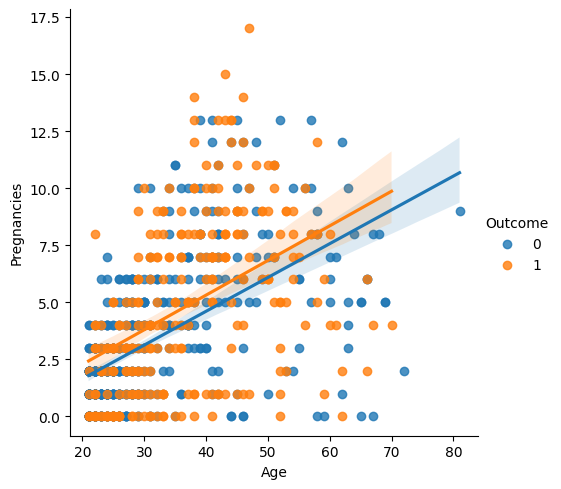

<Figure size 200x200 with 0 Axes>

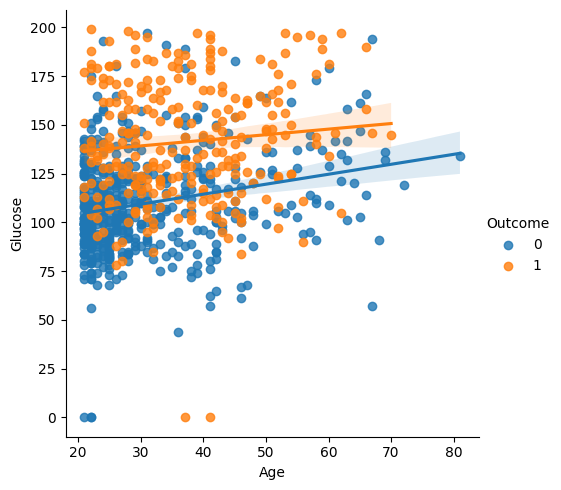

<Figure size 200x200 with 0 Axes>

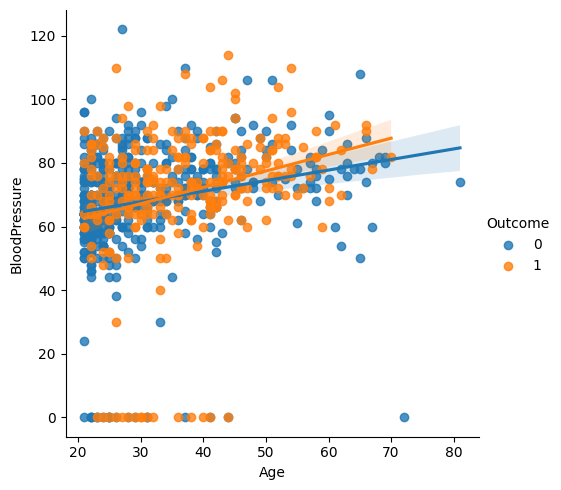

<Figure size 200x200 with 0 Axes>

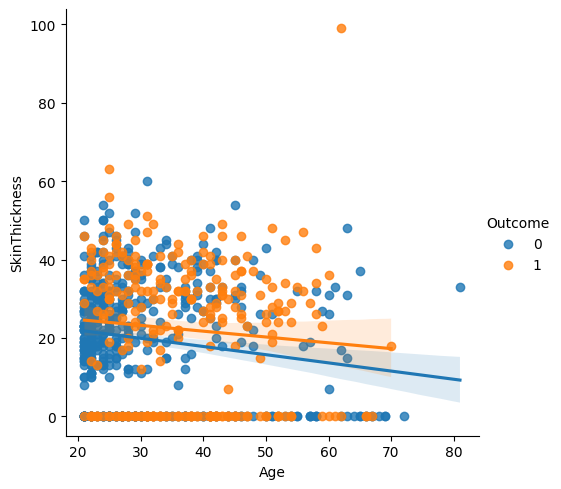

<Figure size 200x200 with 0 Axes>

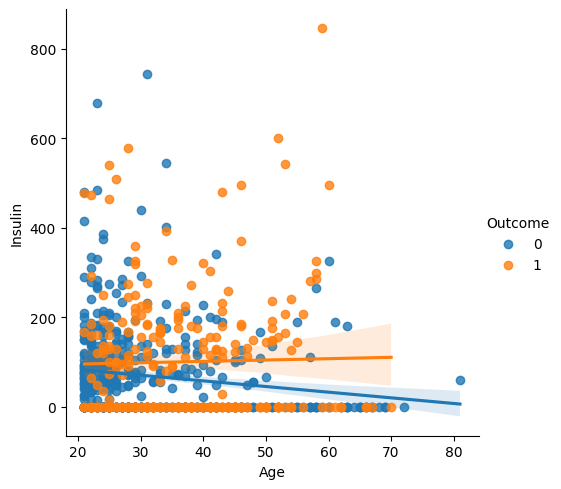

<Figure size 200x200 with 0 Axes>

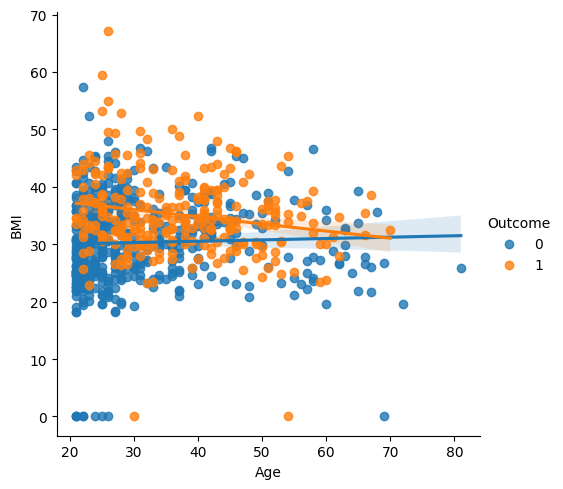

<Figure size 200x200 with 0 Axes>

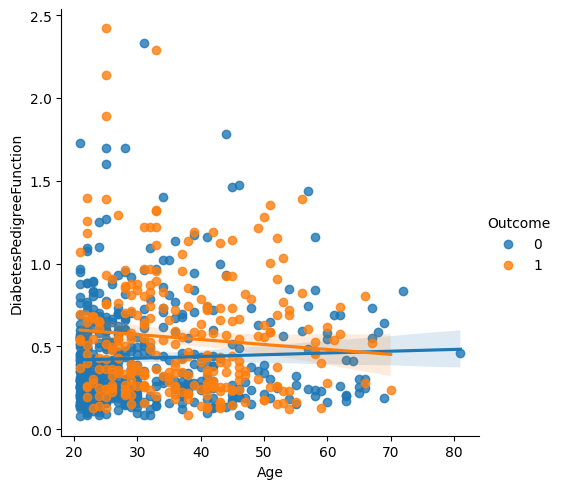

In [14]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']

for col in cols :
        plt.figure(figsize=(2,2))
        sns.lmplot(x="Age", y=col, hue = "Outcome", data=df)
plt.show()

* Blood pressue,glucose, pregnancies and insulin increase with age for both people with diabetes and those without it.
* Diabetes Pedigree Function and BMI decreases with age in people with diabetes.
* Skin Thickness decreases with age.
* Blood pressue,glucose, pregnancies and insulin increase with age for both people with diabetes and those without it.

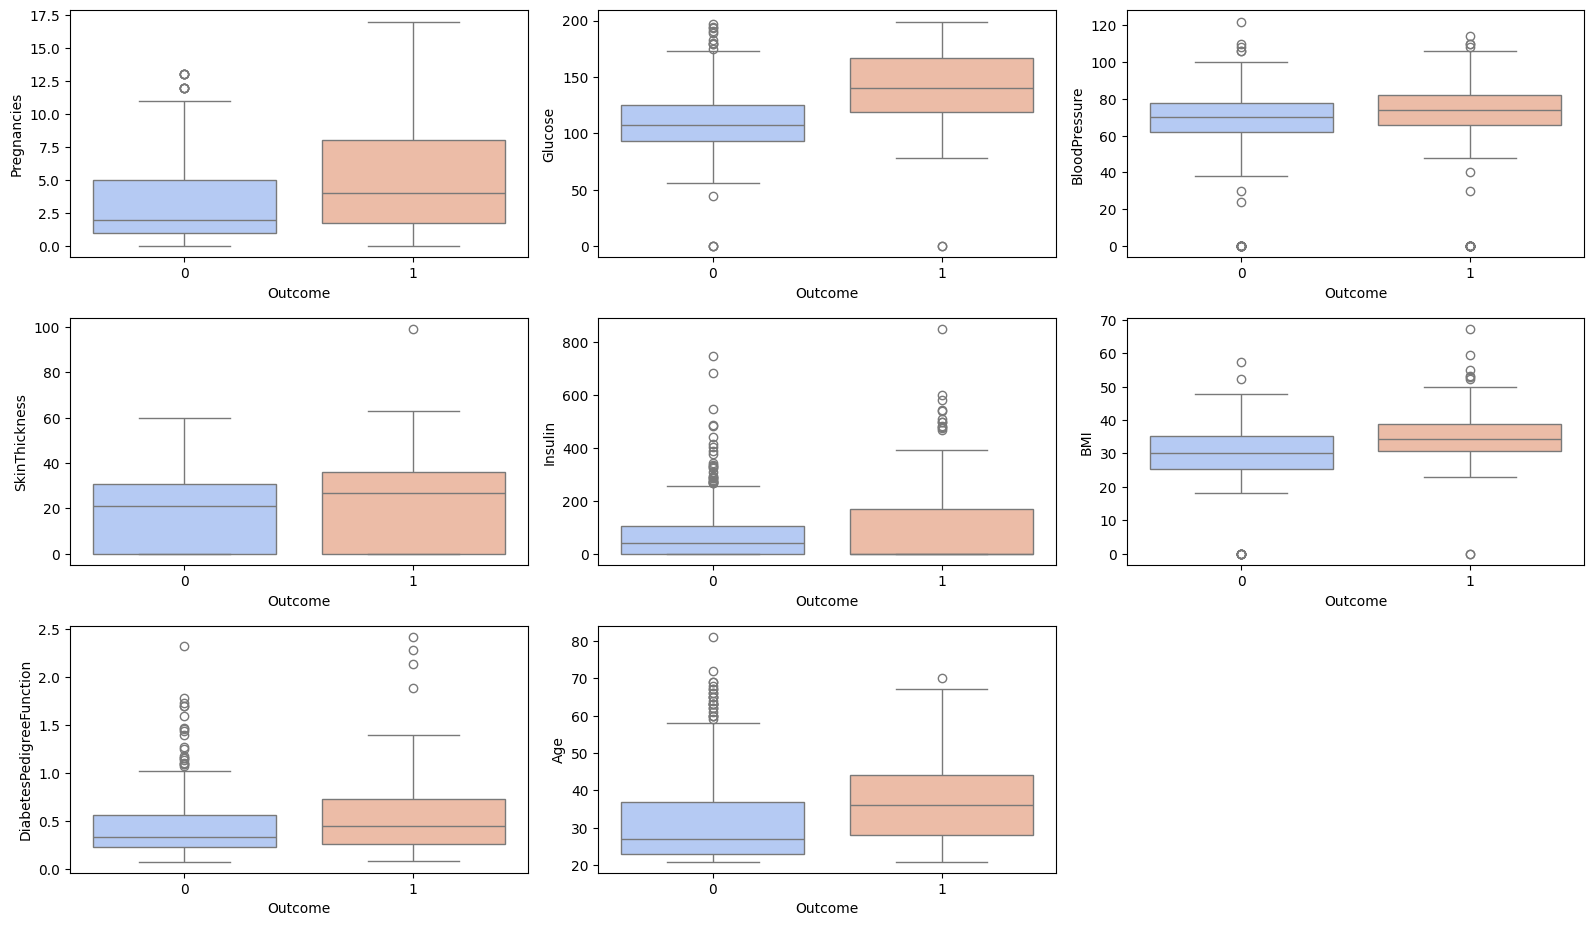

In [15]:
plt.figure(figsize=(16,12))
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
cnt=1
for col in cols :
        #plt.figure(figsize=(5,5))
        plt.subplot(4,3,cnt)
        sns.boxplot(x='Outcome',y=col,data=df, palette='coolwarm')
        cnt= cnt+1
plt.tight_layout()
plt.show()

Pregnancies, Glucose and Age is higher in people with diabetes.
BloodPressure, Skin Thickness, Insulin, BMI, and Diabetes Pedigree Function, is slightly higher in people with diabetes.

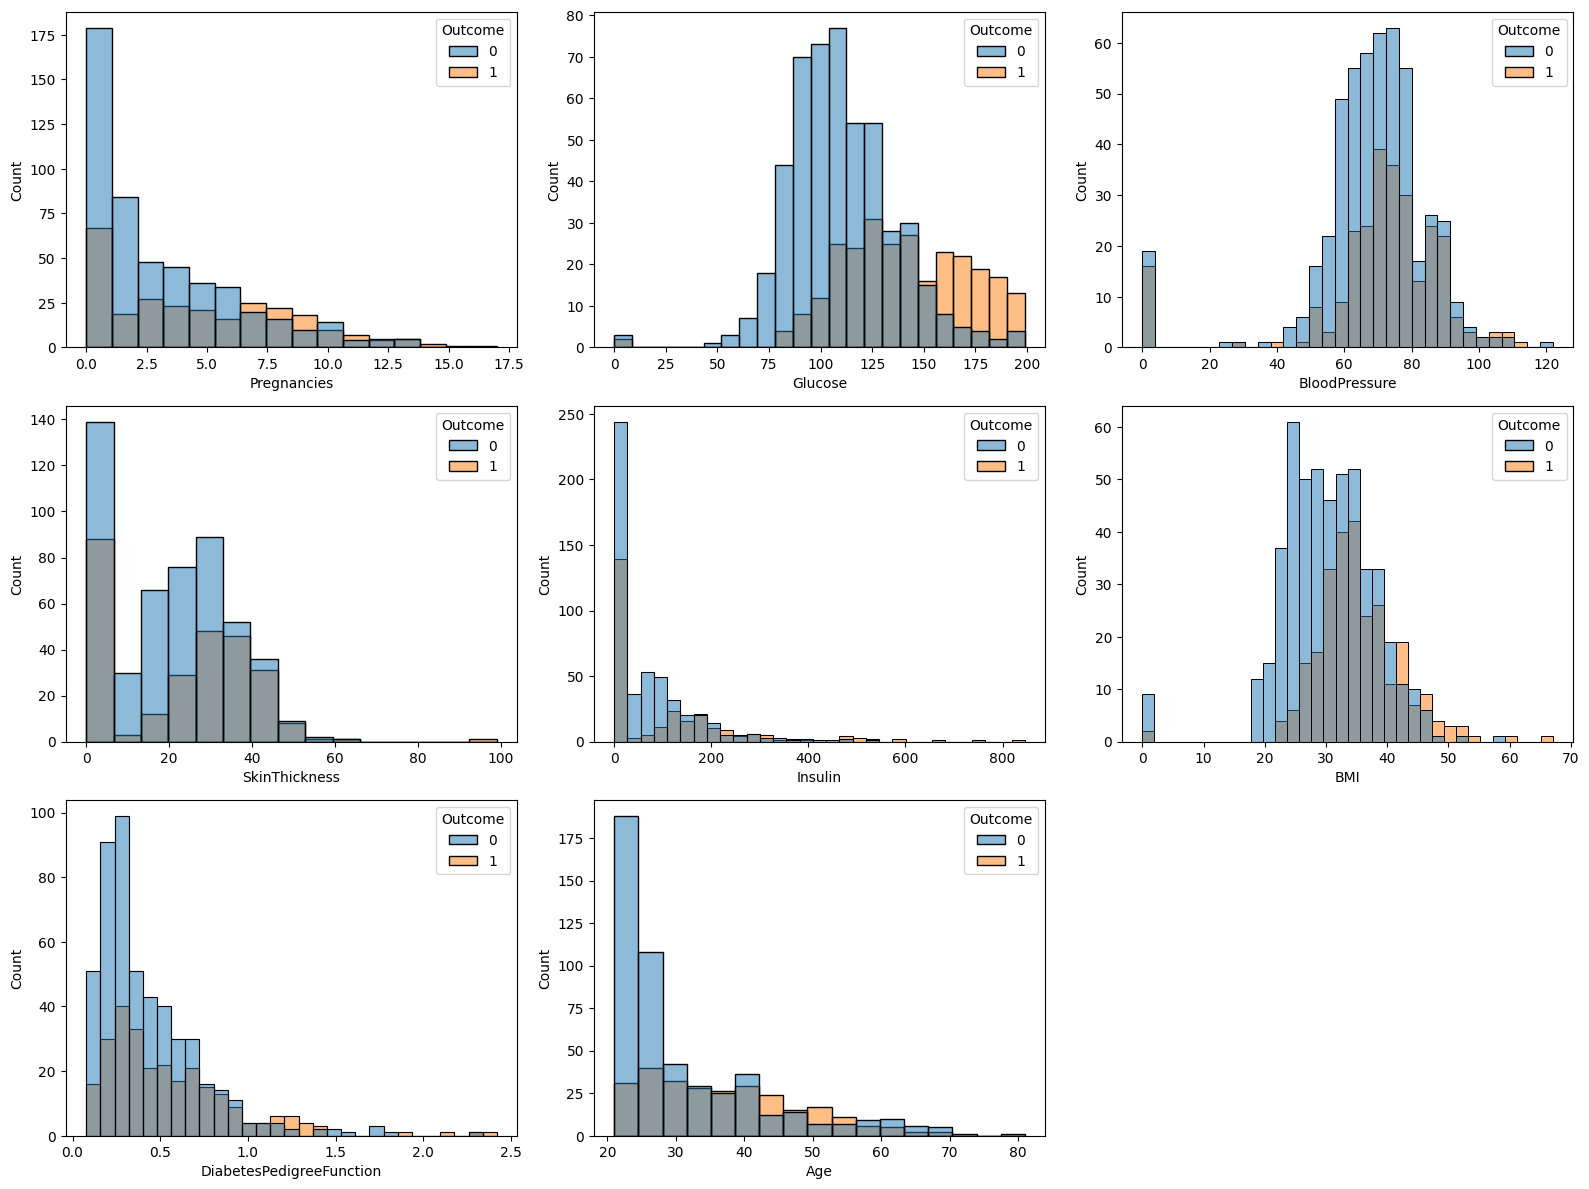

In [16]:
plt.figure(figsize=(16,12))
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
cnt=1
for col in cols :
        plt.subplot(3,3,cnt)
        sns.histplot(x = col, data = df, hue = "Outcome")
        cnt= cnt+1
plt.tight_layout()
plt.show()

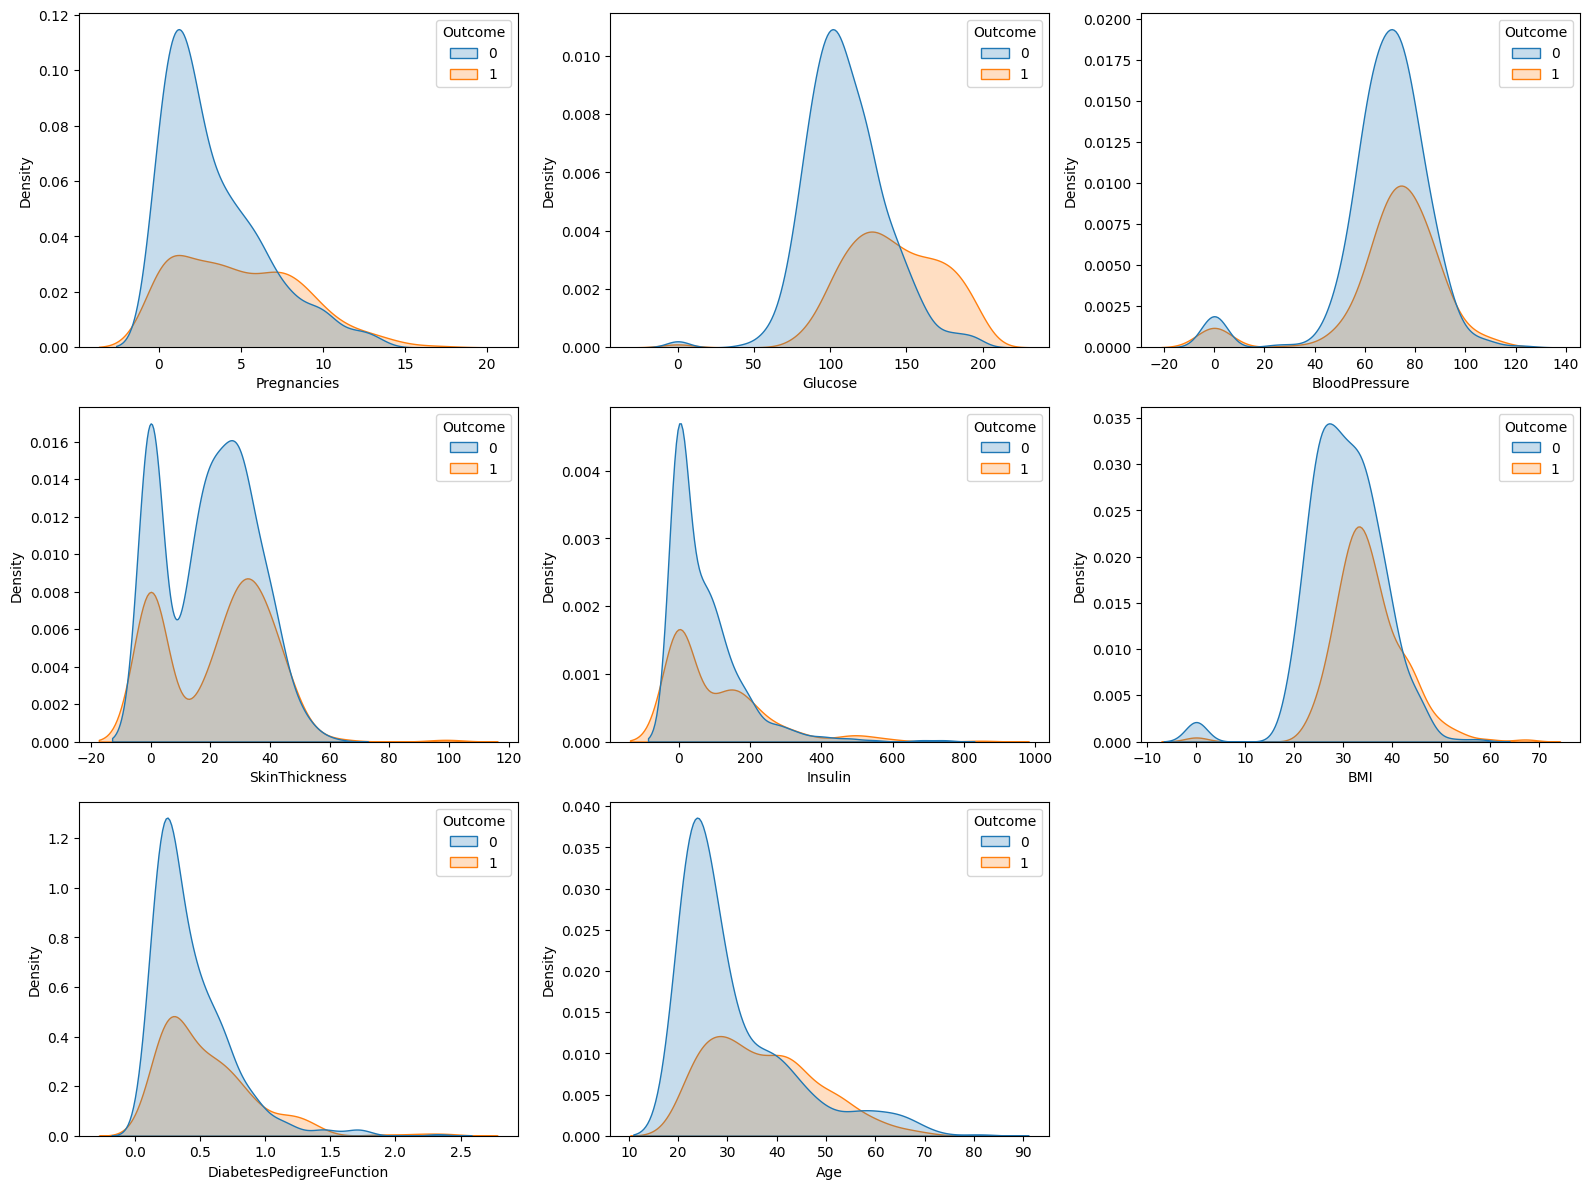

In [17]:
plt.figure(figsize=(16,12))
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
cnt=1
for col in cols :
        plt.subplot(3,3,cnt)
        #sns.histplot(x = col, data = df, hue = "Outcome")
        sns.kdeplot(data=df, x=col, hue='Outcome', shade=True)
        cnt= cnt+1
plt.tight_layout()
plt.show()

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Set Up Features and Target

In [19]:
x = df.drop(['Outcome'], axis = 1).values
y = df['Outcome'].values

# Data Scaling

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


# Split the data into train and test data

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# APPROACH 1 - MODELLING ON IMBALANCED DATA

The data will not be balanced in this approach before doing the modelling. The minority class is not up-sampled.

# 1. A Random Forest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 10000)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10000)

In [23]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score

score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
print("The accuracy score achieved using the Random Forest model is: "+str(score_rf)+" %")

The accuracy score achieved using the Random Forest model is: 75.32 %


# 2. A Decision Tree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    y_pred_dt = dt.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=47)

In [26]:
y_pred_dt = dt.predict(x_test)
y_pred_dt

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [27]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)
print("The accuracy score achieved using the Decision Tree model is: "+str(score_dt)+" %")

The accuracy score achieved using the Decision Tree model is: 73.59 %


# 3. A Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
lr_model

LogisticRegression()

In [29]:
y_pred_lr = lr_model.predict(x_test)
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [30]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using the Logistic Regression model is: "+str(score_lr)+" %")

The accuracy score achieved using the Logistic Regression model is: 74.03 %


# 4. A SVC model

In [31]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [32]:
y_pred_svc = svc_model.predict(x_test)
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [33]:
score_svc = round(accuracy_score(y_pred_svc,y_test)*100,2)
print("The accuracy score achieved using the SVC model is: "+str(score_svc)+" %")

The accuracy score achieved using the SVC model is: 73.59 %


# 5. K Nearest Neighbors Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [35]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [36]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(score_knn)+" %")

The accuracy score achieved using the KNN model is: 69.26 %


# 6. A Naive Bayes Model

In [37]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [38]:
y_pred_nb = nb.predict(x_test)
y_pred_nb

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(score_nb)+" %")

The accuracy score achieved using the Naive Bayes model is: 74.46 %


# 7. A XGBoost Model

In [40]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [41]:
y_pred_xgb = xgb_model.predict(x_test)
y_pred_xgb

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [42]:
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)
print("The accuracy score achieved using the XGBoost model is: "+str(score_xgb)+" %")

The accuracy score achieved using the XGBoost model is: 71.43 %


# A Summary of the Scores

In [43]:
scores = [score_lr,score_nb,score_svc,score_knn,score_dt,score_rf,score_xgb] #,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 74.03 %
The accuracy score achieved using Naive Bayes is: 74.46 %
The accuracy score achieved using Support Vector Machine is: 73.59 %
The accuracy score achieved using K-Nearest Neighbors is: 69.26 %
The accuracy score achieved using Decision Tree is: 73.59 %
The accuracy score achieved using Random Forest is: 75.32 %
The accuracy score achieved using XGBoost is: 71.43 %


# A COMPARISON OF THE ACCURACY OF THE SEVEN MODELS

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

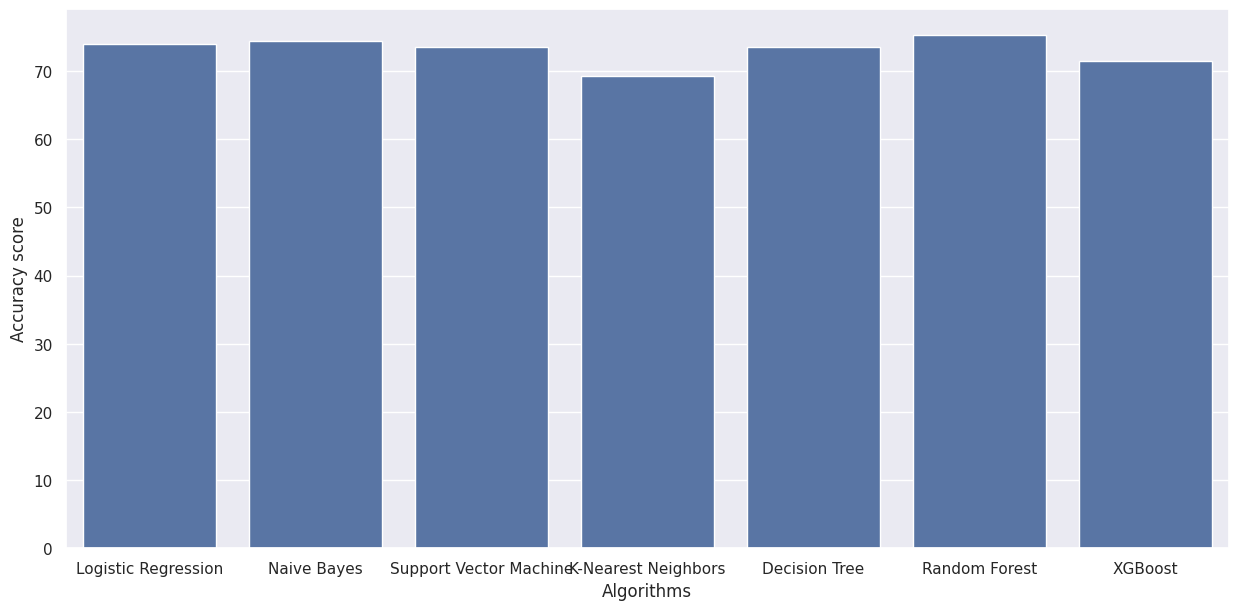

In [44]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)

# Evaluation of the Random Forest Model

# Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

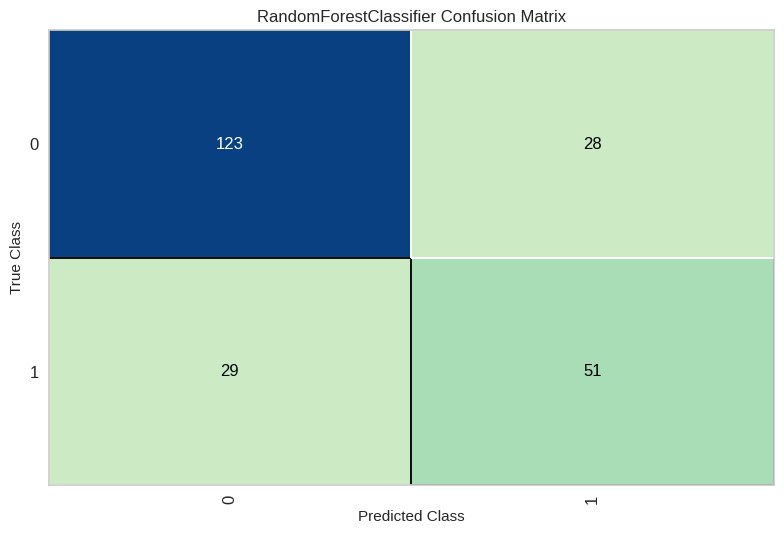

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [46]:
rf_cm = ConfusionMatrix(rf, cmap='GnBu')

rf_cm.fit(x_train, y_train)
rf_cm.score(x_test, y_test)
rf_cm.show()

# Classification Report

In [47]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.65      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.75      0.75      0.75       231



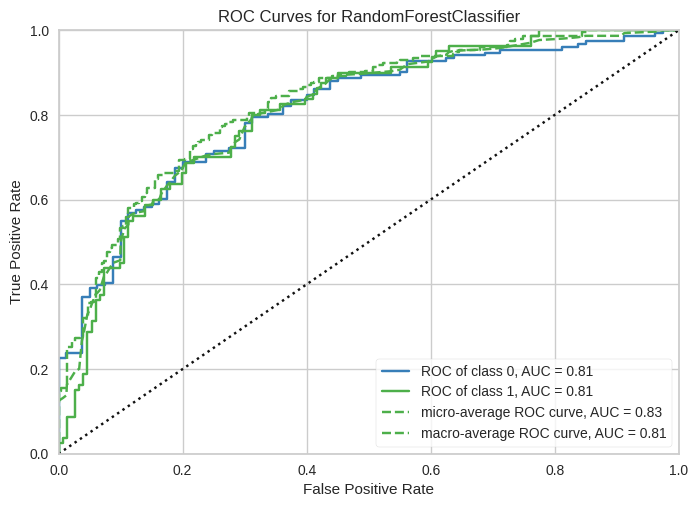

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [48]:
visualizer = ROCAUC(rf)

set_palette('bold')

visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

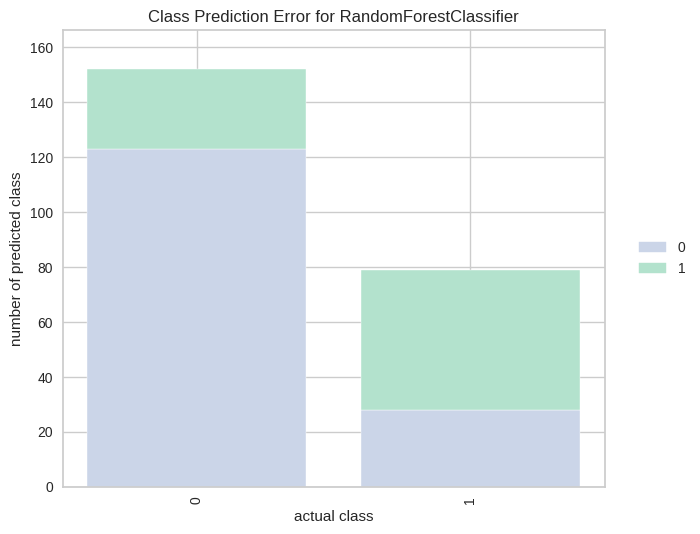

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [49]:
visualizer = ClassPredictionError(rf)

set_palette('pastel')

visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

# APPROACH 2 - MODELLING ON BALANCED DATA

In this approach the data will be balanced before modelling. The minority class is up-sampled.

In [50]:
from sklearn.utils import resample

print(df['Outcome'].value_counts())


Outcome
0    500
1    268
Name: count, dtype: int64


In [51]:
#Separate majority and minority classes
df_majority = df[df['Outcome'] == 0]
df_minority = df[df['Outcome'] == 1]

In [52]:
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=500,    # to match average class
                                 random_state=42) # reproducible results

In [53]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(df_upsampled['Outcome'].value_counts())

Outcome
0    500
1    500
Name: count, dtype: int64


In [54]:
Y_upsampled = df_upsampled["Outcome"].values
Y_upsampled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
# Define the independent variables

X_upsampled = df_upsampled.drop(labels = ["Outcome"], axis=1)
#X_upsampled = normalize(X_upsampled, axis=1)

In [56]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled,
                                                                                            Y_upsampled,
                                                                                            test_size=0.2,
                                                                                            random_state=20)

# 1. A Random Forest Model

In [57]:
#Train again with new upsamples data
rf_upsampled = RandomForestClassifier(n_estimators = 56, random_state = 42)

# Train the model on training data
rf_upsampled.fit(X_train_upsampled, y_train_upsampled)


RandomForestClassifier(n_estimators=56, random_state=42)

In [58]:
y_pred_rf_upsampled = rf_upsampled.predict(X_test_upsampled)
y_pred_rf_upsampled

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1])

In [59]:
from sklearn.metrics import accuracy_score

score_rf_upsampled = round(accuracy_score(y_pred_rf_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the Random Forest model is: "+str(score_rf_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the Random Forest model is: 90.0 %


# Confusion Matrix¶

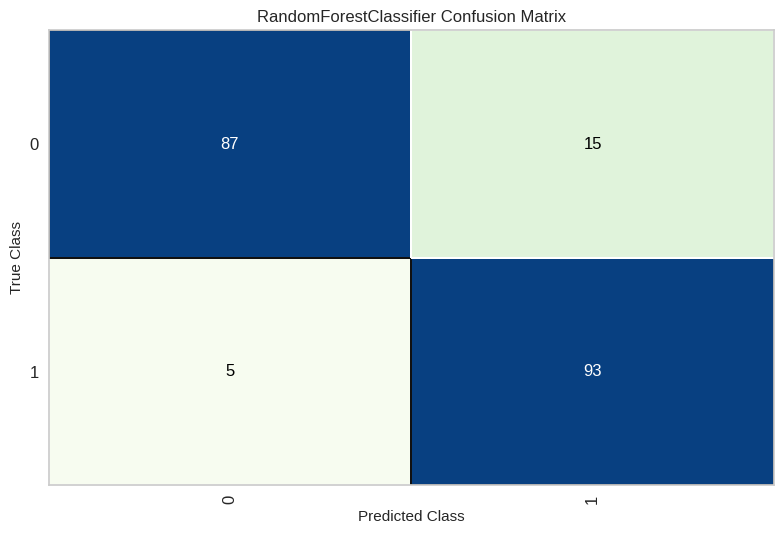

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [60]:
rf_upsampled_cm = ConfusionMatrix(rf_upsampled, cmap='GnBu')

rf_upsampled_cm.fit(X_train_upsampled, y_train_upsampled)
rf_upsampled_cm.score(X_test_upsampled, y_test_upsampled)
rf_upsampled_cm.show()

# Classification Report¶

In [61]:
print(classification_report(y_test_upsampled, y_pred_rf_upsampled))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       102
           1       0.86      0.95      0.90        98

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [62]:
from sklearn.metrics import roc_auc_score

cm_upsampled = confusion_matrix(y_test_upsampled, y_pred_rf_upsampled)
print(cm_upsampled)

print("No diabetes =  = ", cm_upsampled[0,0] / (cm_upsampled[0,0]+cm_upsampled[1,0])*100)
print("With diabetes = ",  cm_upsampled[1,1] / (cm_upsampled[0,1]+cm_upsampled[1,1])*100)


print("ROC_AUC score for balanced data using upsampling is:")
print(roc_auc_score(y_test_upsampled, y_pred_rf_upsampled)*100)

[[87 15]
 [ 5 93]]
No diabetes =  =  94.56521739130434
With diabetes =  86.11111111111111
ROC_AUC score for balanced data using upsampling is:
90.09603841536614


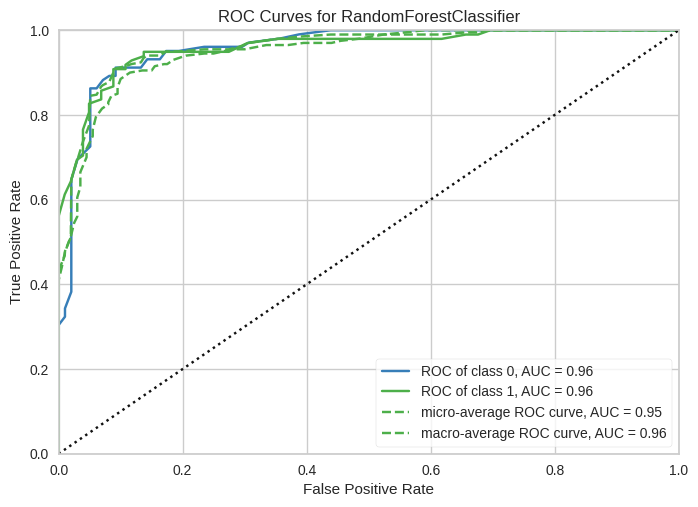

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [63]:
visualizer = ROCAUC(rf_upsampled)

set_palette('bold')

visualizer.fit(X_train_upsampled, y_train_upsampled)        # Fit the training data to the visualizer
visualizer.score(X_test_upsampled, y_test_upsampled)        # Evaluate the model on the test data
visualizer.show()

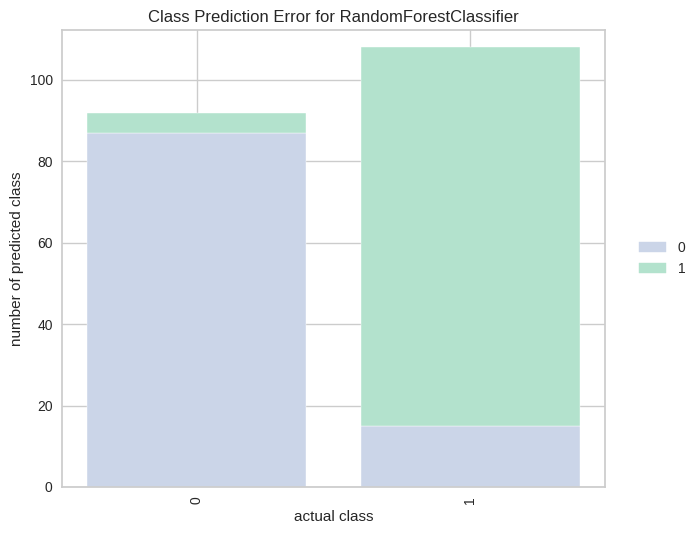

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [64]:
visualizer = ClassPredictionError(rf_upsampled)

set_palette('pastel')

visualizer.fit(X_train_upsampled, y_train_upsampled)
visualizer.score(X_test_upsampled, y_test_upsampled)
visualizer.show()

# 2. A Decision Tree Model

In [65]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(500):
    dt_upsampled = DecisionTreeClassifier(random_state=x)
    dt_upsampled.fit(X_train_upsampled,y_train_upsampled)
    y_pred_dt_upsampled = dt_upsampled.predict(X_test_upsampled)
    current_accuracy = round(accuracy_score(y_pred_dt_upsampled,y_test_upsampled)*100)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

In [66]:
dt_upsampled = DecisionTreeClassifier(random_state=best_x)
dt_upsampled.fit(X_train_upsampled,y_train_upsampled)

DecisionTreeClassifier(random_state=363)

In [67]:
y_pred_dt_upsampled = dt_upsampled.predict(X_test_upsampled)
y_pred_dt_upsampled

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1])

In [68]:
score_dt_upsampled = round(accuracy_score(y_pred_dt_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the Decision Tree model is: "+str(score_dt_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the Decision Tree model is: 89.0 %


# Confusion Matrix

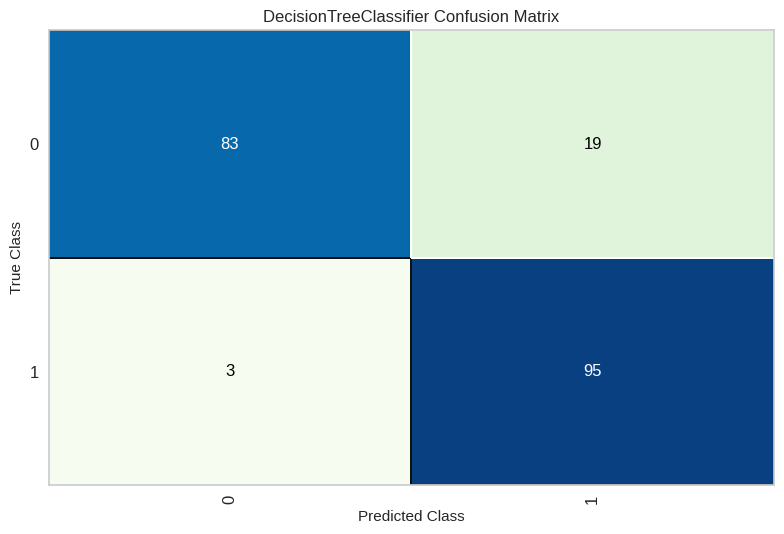

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [69]:
dt_upsampled_cm = ConfusionMatrix(dt_upsampled, cmap='GnBu')

dt_upsampled_cm.fit(X_train_upsampled, y_train_upsampled)
dt_upsampled_cm.score(X_test_upsampled, y_test_upsampled)
dt_upsampled_cm.show()

# Classification Report

In [70]:
print(classification_report(y_test_upsampled, y_pred_dt_upsampled))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88       102
           1       0.83      0.97      0.90        98

    accuracy                           0.89       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.89      0.89       200



In [71]:
from sklearn.metrics import roc_auc_score

cm_upsampled = confusion_matrix(y_test_upsampled, y_pred_dt_upsampled)
print(cm_upsampled)

print("No Diabetes =  = ", cm_upsampled[0,0] / (cm_upsampled[0,0]+cm_upsampled[1,0])*100)
print("With Diabetes = ",  cm_upsampled[1,1] / (cm_upsampled[0,1]+cm_upsampled[1,1])*100)


print("ROC_AUC score for balanced data using upsampling is:")
print(roc_auc_score(y_test_upsampled, y_pred_dt_upsampled)*100)

[[83 19]
 [ 3 95]]
No Diabetes =  =  96.51162790697676
With Diabetes =  83.33333333333334
ROC_AUC score for balanced data using upsampling is:
89.15566226490596


# 3. A Logistic Regression Model

In [72]:
from sklearn.linear_model import LogisticRegression

lr_model_upsampled = LogisticRegression(random_state=42, max_iter = 1000).fit(X_train_upsampled,y_train_upsampled)
lr_model_upsampled

LogisticRegression(max_iter=1000, random_state=42)

In [73]:
y_pred_lr_upsampled = lr_model_upsampled.predict(X_test_upsampled)
y_pred_lr_upsampled

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0])

In [74]:
score_lr_upsampled = round(accuracy_score(y_pred_lr_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the LogisticRegression model is: "+str(score_lr_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the LogisticRegression model is: 72.5 %


# 4. A SVM model

In [75]:
from sklearn.svm import SVC

svc_upsampled = SVC()
svc_upsampled.fit(X_train_upsampled,y_train_upsampled)

SVC()

In [76]:
y_pred_svc_upsampled = svc_upsampled.predict(X_test_upsampled)
y_pred_svc_upsampled

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0])

In [77]:
score_svc_upsampled = round(accuracy_score(y_pred_svc_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the svm model is: "+str(score_svc_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the svm model is: 75.0 %


# 5. A XGBoost Model

In [78]:
import xgboost as xgb

xgb_upsampled = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_upsampled.fit(X_train_upsampled, y_train_upsampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [79]:
y_pred_xgb_upsampled = xgb_upsampled.predict(X_test_upsampled)
y_pred_xgb_upsampled

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1])

In [80]:
score_xgb_upsampled = round(accuracy_score(y_pred_xgb_upsampled,y_test_upsampled)*100,2)
print("********* METRICS FOR BALANCED DATA USING UPSAMPLING *********")
print("The accuracy score achieved using the XGB model is: "+str(score_xgb_upsampled)+" %")

********* METRICS FOR BALANCED DATA USING UPSAMPLING *********
The accuracy score achieved using the XGB model is: 87.5 %


# 6. A K Nearest Neighbors Model

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_upsampled,y_train_upsampled)

KNeighborsClassifier(n_neighbors=7)

In [82]:
y_pred_knn_upsampled = knn.predict(X_test_upsampled)
y_pred_knn_upsampled

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0])

In [83]:
score_knn_upsampled = round(accuracy_score(y_pred_knn_upsampled,y_test_upsampled)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(score_knn_upsampled)+" %")

The accuracy score achieved using the KNN model is: 75.0 %


#  7. A Naive Bayes Model

In [84]:
from sklearn.naive_bayes import GaussianNB

nb_upsampled = GaussianNB()
nb_upsampled.fit(X_train_upsampled,y_train_upsampled)

GaussianNB()

In [85]:
y_pred_nb_upsampled = nb_upsampled.predict(X_test_upsampled)
y_pred_nb_upsampled

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0])

In [86]:
score_nb_upsampled = round(accuracy_score(y_pred_nb_upsampled,y_test_upsampled)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(score_nb_upsampled)+" %")

The accuracy score achieved using the Naive Bayes model is: 73.5 %


# A Summary of the Scores

In [87]:
scores = [score_lr_upsampled,score_svc_upsampled,score_dt_upsampled,score_rf_upsampled, score_xgb_upsampled,score_knn_upsampled, score_nb_upsampled]
algorithms = ["Logistic Regression","Support Vector Machine","Decision Tree","Random Forest", "K-Nearest Neighbors", "Naive Bayes","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 72.5 %
The accuracy score achieved using Support Vector Machine is: 75.0 %
The accuracy score achieved using Decision Tree is: 89.0 %
The accuracy score achieved using Random Forest is: 90.0 %
The accuracy score achieved using K-Nearest Neighbors is: 87.5 %
The accuracy score achieved using Naive Bayes is: 75.0 %
The accuracy score achieved using XGBoost is: 73.5 %


# A COMPARISON OF THE ACCURACY OF THE SEVEN MODELS

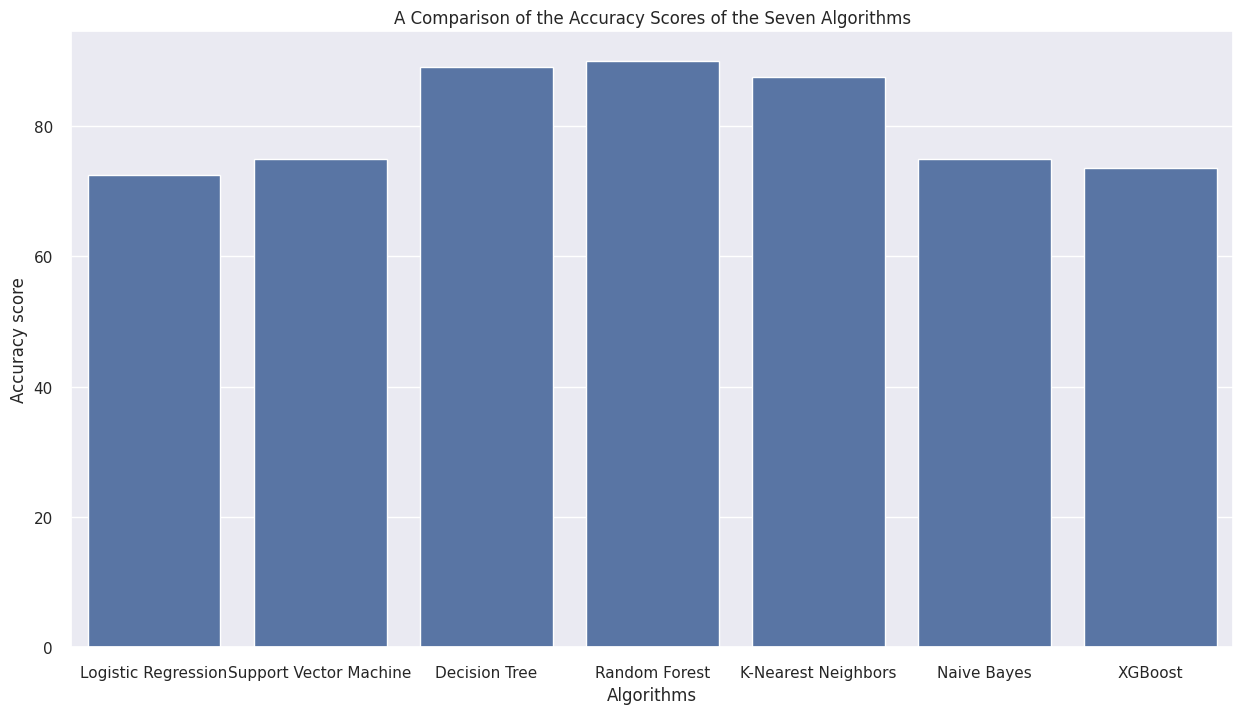

In [88]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms,y=scores)
plt.title("A Comparison of the Accuracy Scores of the Seven Algorithms")
plt.show()

# Making a predictive system

In [89]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_upsampled.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


# Saving the trained model

In [90]:
import pickle

In [91]:
filename = 'diabetes_model.sav'
pickle.dump(rf_upsampled, open(filename, 'wb'))

In [92]:
#loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav','rb'))

In [93]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_upsampled.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
